**Prática de Segmentação de imagens**

In [4]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

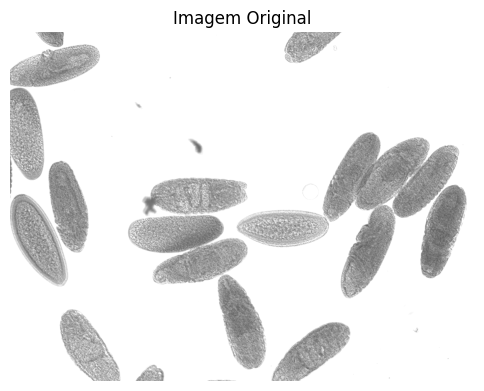

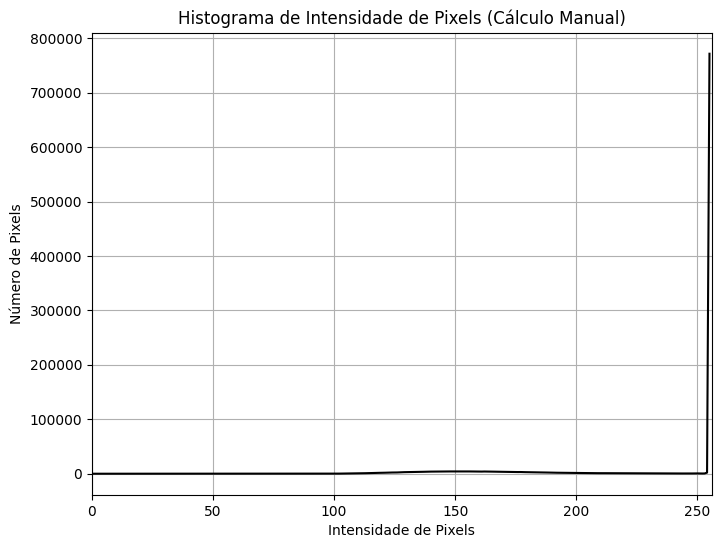

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if img1 is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho do arquivo.")
else:
    # Plotar a imagem original
    plt.figure(figsize=(6, 6))
    plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
    plt.title("Imagem Original")
    plt.axis('off')
    plt.show()

    # Inicializar o histograma
    histograma_manual = np.zeros(256, dtype=int)

    # Contar as intensidades de pixels
    for i in range(img1.shape[0]):  # percorre as linhas
        for j in range(img1.shape[1]):  # percorre as colunas
            intensidade = img1[i, j]  # valor do pixel
            histograma_manual[intensidade] += 1  # incrementar a contagem

    # Plotar o histograma manualmente calculado
    plt.figure(figsize=(8, 6))
    plt.plot(histograma_manual, color='black')
    plt.title('Histograma de Intensidade de Pixels (Cálculo Manual)')
    plt.xlabel('Intensidade de Pixels')
    plt.ylabel('Número de Pixels')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.show()

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

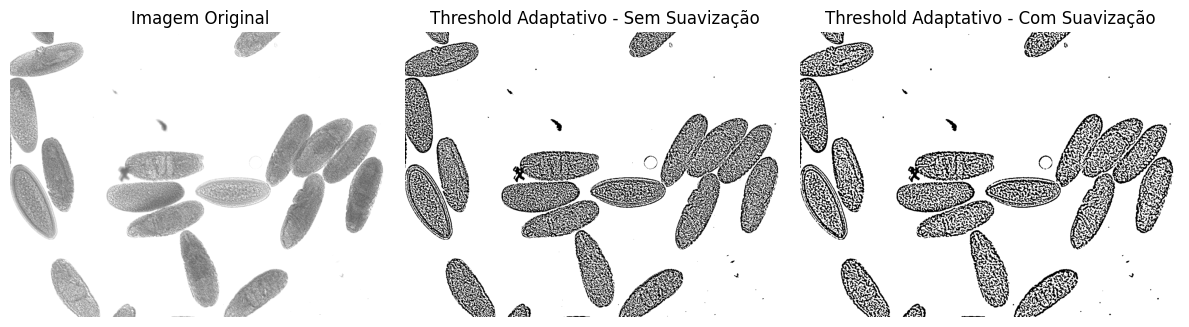

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para aplicar o Threshold Adaptativo manualmente
def limiar_adaptativo(imagem, tamanho_bloco=11, C=5):
    # Verifica se o tamanho do bloco é ímpar
    if tamanho_bloco % 2 == 0:
        raise ValueError("tamanho_bloco deve ser ímpar.")
    
    # Pega o tamanho da imagem
    altura, largura = imagem.shape
    
    # Cria uma imagem em branco para o resultado
    resultado = np.zeros((altura, largura), dtype=np.uint8)
    
    # Metade do tamanho do bloco (para calcular a vizinhança)
    metade_bloco = tamanho_bloco // 2
    
    # Adiciona padding à imagem
    imagem_padded = cv2.copyMakeBorder(imagem, metade_bloco, metade_bloco, metade_bloco, metade_bloco, cv2.BORDER_REFLECT)
    
    # Itera sobre cada pixel da imagem original
    for i in range(metade_bloco, altura + metade_bloco):
        for j in range(metade_bloco, largura + metade_bloco):
            # Define a vizinhança (janela) ao redor do pixel atual
            janela = imagem_padded[i - metade_bloco:i + metade_bloco + 1, j - metade_bloco:j + metade_bloco + 1]
            
            # Calcula a média da vizinhança
            valor_medio = np.mean(janela)
            
            # Aplica o threshold
            if imagem_padded[i, j] > (valor_medio - C):
                resultado[i - metade_bloco, j - metade_bloco] = 255  # Branco
            else:
                resultado[i - metade_bloco, j - metade_bloco] = 0  # Preto
    
    return resultado

# Carrega a imagem em escala de cinza
imagem_original = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

# Aplica o Threshold Adaptativo manualmente (sem suavização)
limiar_sem_suavizacao = limiar_adaptativo(imagem_original, tamanho_bloco=11, C=2)

# Suaviza a imagem usando filtro Gaussiano
imagem_suavizada = cv2.GaussianBlur(imagem_original, (5, 5), 0)

# Aplica o Threshold Adaptativo manualmente (com suavização)
limiar_com_suavizacao = limiar_adaptativo(imagem_suavizada, tamanho_bloco=11, C=2)

# Exibir a imagem original, sem suavização e com suavização
plt.figure(figsize=(12, 6))

# Imagem Original
plt.subplot(1, 3, 1)
plt.imshow(imagem_original, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Threshold Adaptativo sem suavização
plt.subplot(1, 3, 2)
plt.imshow(limiar_sem_suavizacao, cmap='gray', vmin=0, vmax=255)
plt.title('Threshold Adaptativo - Sem Suavização')
plt.axis('off')

# Threshold Adaptativo com suavização
plt.subplot(1, 3, 3)
plt.imshow(limiar_com_suavizacao, cmap='gray', vmin=0, vmax=255)
plt.title('Threshold Adaptativo - Com Suavização')
plt.axis('off')

# Exibe o resultado
plt.tight_layout()
plt.show()


3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def otsu_manual(imagem):
   
   
    hist, _ = np.histogram(imagem.ravel(), bins=256, range=(0, 256))

    
    total_pixels = imagem.size
    soma_total = np.dot(np.arange(256), hist)
    soma_fundo, peso_fundo = 0, 0
    variancia_max, limiar_ideal = 0, 0

    
    for t in range(256):
        peso_fundo += hist[t]
        if peso_fundo == 0:
            continue
        peso_objeto = total_pixels - peso_fundo
        if peso_objeto == 0:
            break

        soma_fundo += t * hist[t]

        media_fundo = soma_fundo / peso_fundo
        media_objeto = (soma_total - soma_fundo) / peso_objeto

        variancia_entre = peso_fundo * peso_objeto * (media_fundo - media_objeto) ** 2

      
        if variancia_entre > variancia_max:
            variancia_max = variancia_entre
            limiar_ideal = t

    return limiar_ideal


def aplicar_threshold(imagem, limiar):


    imagem_segmentada = np.where(imagem >= limiar, 255, 0).astype(np.uint8)
    return imagem_segmentada


def mostrar_resultados(imagem_original, imagem_segmentada, limiar):
    """
   
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(imagem_original.ravel(), bins=256, range=(0, 256), color='gray')
    plt.axvline(limiar, color='r', linestyle='--', label=f'Limiar de Otsu: {limiar}')
    plt.title("Histograma e Limiar de Otsu")
    plt.legend()

 
    plt.subplot(1, 2, 2)
    plt.imshow(imagem_segmentada, cmap='gray')
    plt.title("Imagem Segmentada")

    plt.tight_layout()
    plt.show()

imagem_cinza = cv2.imread('/content/insitu107595.jpg', cv2.IMREAD_GRAYSCALE)


limiar_otimizado = otsu_manual(imagem_cinza)


imagem_segmentada = aplicar_threshold(imagem_cinza, limiar_otimizado)


mostrar_resultados(imagem_cinza, imagem_segmentada, limiar_otimizado)


[ WARN:0@3.629] global loadsave.cpp:241 findDecoder imread_('/content/insitu107595.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'ravel'

In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters


def otsu_baseado_variancia_classes(imagem):
    contagem_pixels, limites_bins = np.histogram(imagem.ravel(), bins=256, range=(0, 256))
    total_pixels = imagem.size
    max_atual, limiar = 0, 0
    soma_total = np.dot(np.arange(256), contagem_pixels)
    soma_fundo, peso_fundo = 0, 0
    variancias = []
    for t in range(256):
        peso_fundo += contagem_pixels[t]
        if peso_fundo == 0:
            continue
        peso_frente = total_pixels - peso_fundo
        if peso_frente == 0:
            break
        soma_fundo += t * contagem_pixels[t]
        media_fundo = soma_fundo / peso_fundo
        media_frente = (soma_total - soma_fundo) / peso_frente
        variancia_entre_classes = peso_fundo * peso_frente * (media_fundo - media_frente) ** 2
        variancias.append(variancia_entre_classes) 
        if variancia_entre_classes > max_atual:
            max_atual = variancia_entre_classes
            limiar = t
    return limiar, variancias, contagem_pixels, limites_bins


def aplicar_otsu(nome_imagem, titulo_imagem):
 
    imagem = cv2.imread(nome_imagem)
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

   
    limiar_sem_suavizacao, variancias_sem_suavizacao, contagem, limites_bins = otsu_baseado_variancia_classes(imagem_cinza)

    imagem_suavizada = filters.gaussian(imagem_cinza, sigma=1)

  
    imagem_suavizada = (imagem_suavizada * 255).astype(np.uint8)

   
    limiar_com_suavizacao, variancias_com_suavizacao, _, _ = otsu_baseado_variancia_classes(imagem_suavizada)

   
    fig, eixos = plt.subplots(2, 2, figsize=(14, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

   
    eixos[0, 0].hist(imagem_cinza.ravel(), bins=256, range=(0, 256), alpha=0.5, color='gray')
    eixos[0, 0].axvline(limiar_sem_suavizacao, color='r', linestyle='--', label=f'Limiar: {limiar_sem_suavizacao}')
    eixos[0, 0].set_title(f'Histograma {titulo_imagem} (Sem Suavização)')
    eixos[0, 0].set_xlabel('Intensidade de Cinza')
    eixos[0, 0].set_ylabel('Número de Pixels')
    eixos[0, 0].legend()

    
    eixos[0, 1].plot(variancias_sem_suavizacao, color='blue')
    eixos[0, 1].set_title(f'Variância entre Classes {titulo_imagem} (Sem Suavização)')
    eixos[0, 1].set_xlabel('Nível de Cinza')
    eixos[0, 1].set_ylabel('Variância entre Classes')

    
    eixos[1, 0].hist(imagem_suavizada.ravel(), bins=256, range=(0, 256), alpha=0.5, color='gray')
    eixos[1, 0].axvline(limiar_com_suavizacao, color='r', linestyle='--', label=f'Limiar: {limiar_com_suavizacao}')
    eixos[1, 0].set_title(f'Histograma {titulo_imagem} (Com Suavização)')
    eixos[1, 0].set_xlabel('Intensidade de Cinza')
    eixos[1, 0].set_ylabel('Número de Pixels')
    eixos[1, 0].legend()

    eixos[1, 1].plot(variancias_com_suavizacao, color='blue')
    eixos[1, 1].set_title(f'Variância entre Classes {titulo_imagem} (Com Suavização)')
    eixos[1, 1].set_xlabel('Nível de Cinza')
    eixos[1, 1].set_ylabel('Variância entre Classes')

    plt.show()

img1 = cv2.imread('/content/HE.jpg')
img2 = cv2.imread('/content/Lenna.jpg')
img3 = cv2.imread('/content/madrill.tiff')

aplicar_otsu('/content/HE.jpg', 'HE')
aplicar_otsu('/content/Lenna.jpg', 'Lenna')
aplicar_otsu('/content/madrill.tiff', 'Madrill')


ModuleNotFoundError: No module named 'skimage'